
# Cueing Behavioural Analysis Winter 2019


## Setup




In [1]:
# Standard Pythonic imports
import os,sys,glob,numpy as np,pandas as pd
import matplotlib.pyplot as plt 
import scipy.io as sio 

# EEG-Notebooks imports
from eegnb.datasets import datasets

Download the data



In [2]:
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')
cueing_data_path = os.path.join(eegnb_data_path, 'visual-cueing', 'kylemathlab_dev')

# If dataset hasn't been downloaded yet, download it
if not os.path.isdir(cueing_data_path):
      datasets.fetch_dataset(data_dir=eegnb_data_path, experiment='visual-cueing', site='kylemathlab_dev')

## Analyze .mat behavioural data for Accuracy and RT

Load in subjects



In [3]:
# # Fall 2018
subs = [101, 102, 103, 104, 106, 108, 109, 110, 111, 112,
        202, 203, 204, 205, 207, 208, 209, 210, 211, 
        301, 302, 303, 304, 305, 306, 307, 308, 309]

# 105 - no trials in one condition

# # Winter 2019
# subs = [1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110,
#         1202, 1203, 1205, 1206, 1209, 1210, 1211, 1215,
#         1301, 1302, 1313, 
#         1401, 1402, 1403, 1404, 1405,  1408, 1410, 1411, 1412, 1413, 1413, 1414, 1415, 1416]

# # 1107 - no csv session 1
# # 1201 - no csv session 1
# # 1304 - Muse 2
# # 1308 - Muse 2
# # 1311 - Muse 2
# # 1314 - Muse 2
# # 1407 - only session1

# Both 

# Fall 2018
# subs = [101, 102, 103, 104, 106, 108, 109, 110, 111, 112,
#         202, 203, 204, 205, 207, 208, 209, 210, 211, 
#         301, 302, 303, 304, 305, 306, 307, 308, 309,
#         1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110,
#         1202, 1203, 1205, 1206, 1209, 1210, 1211, 1215,
#         1301, 1302, 1313, 
#         1401, 1402, 1403, 1404, 1405,  1408, 1410, 1411, 1412, 1413, 1413, 1414, 1415, 1416]

Set some settings



In [4]:
# basic numbers
n_subs = len(subs)
n_sesh = 2
conditions = ['valid','invalid']
n_cond = len(conditions)

# cutoff trials that are too slow or fast
rt_toofast = 250
rt_tooslow = 1500

#creates arrays to save output
count_rt = np.zeros((n_subs, n_sesh, n_cond))
median_rt = np.zeros((n_subs, n_sesh, n_cond))
prop_accu = np.zeros((n_subs, n_sesh, n_cond))

Single Subject example



In [5]:
#select single subject
sub = subs[0]
print('Subject - ' + str(sub))

#just one session 
sesh = 1

#load file
#path =  './subject' + str(sub) + '/session' + str(sesh) + '/'
path =  cueing_data_path + '/muse2016/subject' + str('%04.f' %sub) + '/session' + str('%03.f' %(sesh+1)) + '/'
file =  [x for x in os.listdir(path) if x.endswith('.mat')][0]
output_dict = sio.loadmat(path + file)
print(path + file)

#pull out important info
output = output_dict['output']
accuracy = output[:,6]
rt = output[:,7]
validity = output[:,3]
print(accuracy,rt,validity)

# median rt on each condition	
print('')
print(rt)
print(rt[validity == 0])
print(rt[(validity == 0) & (rt <= rt_tooslow)])

validRT  	=  np.nanmedian(rt[ (validity == 1) &
                              (rt >= rt_toofast) &
                              (rt <= rt_tooslow)])

print('Valid RT = ' + str(validRT) + ' ms')

InvalidRT =  np.nanmedian(rt[ (validity == 0) &
                              (rt >= rt_toofast) &
                              (rt <= rt_tooslow)]) 

print('Invalid RT = ' + str(InvalidRT) + ' ms')

Subject - 101
C:\Users\pavit/.eegnb\data\visual-cueing\kylemathlab_dev/muse2016/subject0101/session002/subject101_session2_behOutput_2018-11-20-16.58.50.mat
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.] [435.031485 423.867152 335.010084 434.945121 297.102568 402.462939
 309.984897 352.377032 315.902263 346.695745 409.051914 337.994502
 412.490445 253.304399 325.551731 451.072688 362.531119 449.032591
 312.999804 293.670213 327.738388 526.629063 459.253055 355.719449
 352.932556 345.884407 454.775045 350.070761 313.989374 374.227764
 369.010847 345.467709 334.978303 334.730519 363.791318 451.067033
 301.155788 419.084514 271.027066 423.420538 342.584127 337.859108
 314.203547 339.341316 467.860489 327.351041 419.173015 340.925891
 318.901094 351.947652 437.583955 290.667171 319.596349 331.919014
 390.521833 412.

Loop through subjects



In [6]:
for isub, sub in enumerate(subs):
    print('Subject - ' + str(sub))
    for sesh in range(n_sesh):
        # get the path and file name and load data
        #path =  './subject' + str(sub) + '/session' + str(sesh+1) + '/'
        path =  cueing_data_path + '/muse2016/subject' + str('%04.f' %sub) + '/session' + str('%03.f' %(sesh+1)) + '/'
       
        file =  [x for x in os.listdir(path) if x.endswith('.mat')][0]
        output_dict = sio.loadmat(path + file)

        # pull out important stuff
        output = output_dict['output']
        accuracy = output[:,6]
        rt = output[:,7]
        validity = output[:,3]
  
        # median rt on each condition	
        median_rt[isub,sesh,:] 	= [  np.nanmedian(rt[ (validity == 1) & (rt >= rt_toofast) & (rt <= rt_tooslow)]),
                                     np.nanmedian(rt[ (validity == 0) & (rt >= rt_toofast) & (rt <= rt_tooslow)]) ]
    
        # proportion accurate (number accurate / count)
        prop_accu[isub,sesh,:]  = [ np.sum(accuracy[(validity == 1) & (rt >= rt_toofast) & (rt <= rt_tooslow)]) / 
                                   np.sum((validity == 1) & (rt >= rt_toofast) & (rt <= rt_tooslow)),
                                   np.sum(accuracy[(validity == 0) & (rt >= rt_toofast) & (rt <= rt_tooslow)]) /
                                   np.sum((validity == 0) & (rt >= rt_toofast) & (rt <= rt_tooslow)) ]

Subject - 101
Subject - 102
Subject - 103
Subject - 104
Subject - 106
Subject - 108
Subject - 109
Subject - 110
Subject - 111
Subject - 112
Subject - 202
Subject - 203
Subject - 204
Subject - 205
Subject - 207
Subject - 208
Subject - 209
Subject - 210
Subject - 211
Subject - 301
Subject - 302
Subject - 303
Subject - 304
Subject - 305
Subject - 306
Subject - 307
Subject - 308
Subject - 309


Average over sessions and print data



In [7]:
# Summary stats and collapse sessions
Out_median_RT = np.squeeze(np.nanmean(median_rt,axis=1))
Out_prop_accu = np.squeeze(np.nanmean(prop_accu,axis=1))

print('Median RT')
print(Out_median_RT)
print('Proportion Accurate')
print(Out_prop_accu)

Median RT
[[361.7079635  364.45366275]
 [547.10713075 611.45526175]
 [600.073256   587.019756  ]
 [535.04144725 533.250092  ]
 [419.24263125 439.1580675 ]
 [456.3330375  631.1320265 ]
 [446.95026625 556.038382  ]
 [484.0763345  478.4887    ]
 [443.5412585  472.331497  ]
 [436.66653125 501.3115865 ]
 [495.63977675 587.358365  ]
 [520.97468575 973.144689  ]
 [395.5098235  370.232933  ]
 [489.59985525 560.08098575]
 [455.6651645  500.22833625]
 [662.9326765  643.0934405 ]
 [488.56224425 474.7125945 ]
 [482.1316255  543.0173155 ]
 [713.4103845  894.0804795 ]
 [485.48053725 533.6649235 ]
 [519.5475525  505.339771  ]
 [488.45884825 500.39610975]
 [527.5814465  533.4898155 ]
 [477.23867575 446.72875575]
 [484.94210575 578.6717025 ]
 [681.7458885  804.780758  ]
 [419.736862   485.569911  ]
 [435.42846425 437.12191   ]]
Proportion Accurate
[[0.98305085 0.96428571]
 [1.         1.        ]
 [0.91680961 0.88974359]
 [0.97767857 0.96428571]
 [0.9822995  1.        ]
 [0.95403439 0.6       ]
 [0.923

Plot barplot of results



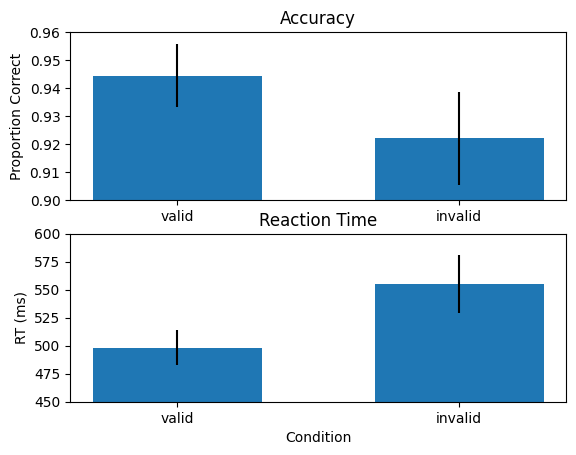

In [8]:
# bar plot results
plt.figure()
# Accuracy
ax = plt.subplot(211)
plt.bar([0,1], np.nanmean(Out_prop_accu,axis=0), 0.6, yerr = np.nanstd(Out_prop_accu,axis=0)/np.sqrt(n_subs))
plt.ylim(.9,.96)
plt.title('Accuracy')
plt.ylabel('Proportion Correct')
ax.set_xticks([0,1])
ax.set_xticklabels(conditions)
# RT
ax = plt.subplot(212)
plt.bar([0,1], np.nanmean(Out_median_RT,axis=0), 0.6, yerr = np.nanstd(Out_median_RT,axis=0)/np.sqrt(n_subs))
plt.ylim(450,600)
plt.title('Reaction Time')
plt.ylabel('RT (ms)')
plt.xlabel('Condition')
ax.set_xticks([0,1])
ax.set_xticklabels(conditions)
plt.show()

Output spreadsheet



In [9]:
## CSV output
column_dict = {'Participant':subs,
               'AccValid':Out_prop_accu[:,0],
               'AccInvalid':Out_prop_accu[:,1],
               'RTValid':Out_median_RT[:,0],
               'RTInvalid':Out_median_RT[:,1] }
df = pd.DataFrame(column_dict)
print(df)
df.to_csv('375CueingBehPy.csv',index=False)

    Participant  AccValid  AccInvalid     RTValid   RTInvalid
0           101  0.983051    0.964286  361.707963  364.453663
1           102  1.000000    1.000000  547.107131  611.455262
2           103  0.916810    0.889744  600.073256  587.019756
3           104  0.977679    0.964286  535.041447  533.250092
4           106  0.982299    1.000000  419.242631  439.158067
5           108  0.954034    0.600000  456.333038  631.132027
6           109  0.923469    0.977273  446.950266  556.038382
7           110  0.990196    0.970588  484.076334  478.488700
8           111  0.973960    1.000000  443.541259  472.331497
9           112  0.682759    0.833333  436.666531  501.311586
10          202  0.899140    0.897321  495.639777  587.358365
11          203  0.920807    0.733333  520.974686  973.144689
12          204  0.947160    0.916667  395.509823  370.232933
13          205  0.957555    1.000000  489.599855  560.080986
14          207  0.959592    0.949495  455.665165  500.228336
15      